## Project Name: Heart Attack Risk Predictor

### In this project we will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

### We will do the following things:
- Data Analysis 
- Feature Engineering 
- Standardization
- Model Building
- Predictions

### 1. Let us import the necessary liabraries and read our DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Let us import our Data Set


# 2.Data Gathering

In [2]:
df=pd.read_csv('heart (2).csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

# 3.Understanding of Dataset



#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

##### thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease. -->

#### slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

#### Old peak :the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.


#### target : 0= less chance of heart attack 1= more chance of heart attack

# 4.Data Analsys

In [7]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [8]:
df.shape

(303, 14)

In [9]:
df.axes

[RangeIndex(start=0, stop=303, step=1),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object')]

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### As we can see there are no null values in our Data Set

In [14]:
df[df.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

In [15]:
df=df[~df.duplicated()]

In [16]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
target   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trestbps -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalach   0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exang    -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slope     0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
ca       -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thal     -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
target    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

              thal    target  
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trestbps  0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalach  -0.094910  0.419955  
exang     0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slope    -0.103314  0.343940  
ca        0.160085 -0.408992  
thal      1.000000 -0.343101  
target   -0.343101  1.000000

# 5.Data analsys-Graphical

<AxesSubplot:>

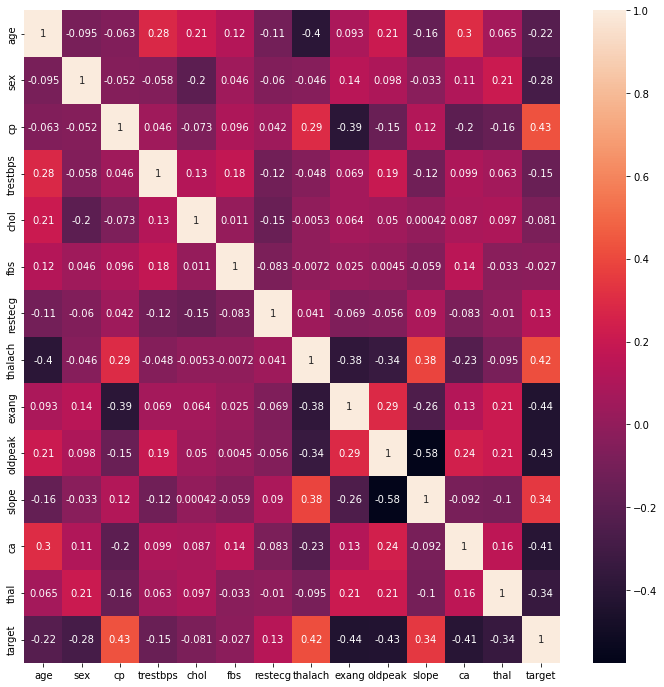

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True)

#### As we can see our variables are not highly correlated to each other 

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[302 rows x 14 columns]

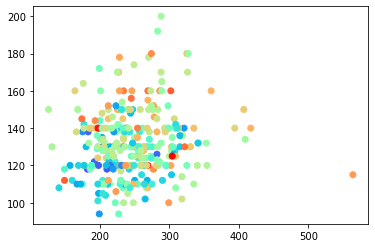

In [20]:
plt.scatter(df['chol'],df['trestbps'], c = df['age'],cmap = 'rainbow')

<AxesSubplot:xlabel='target', ylabel='count'>

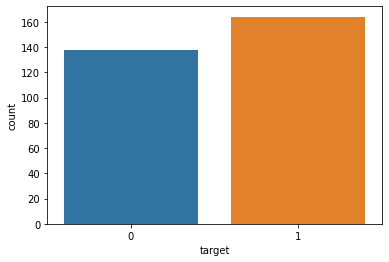

In [21]:
sns.countplot(x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='count'>

<AxesSubplot:xlabel='target', ylabel='count'>

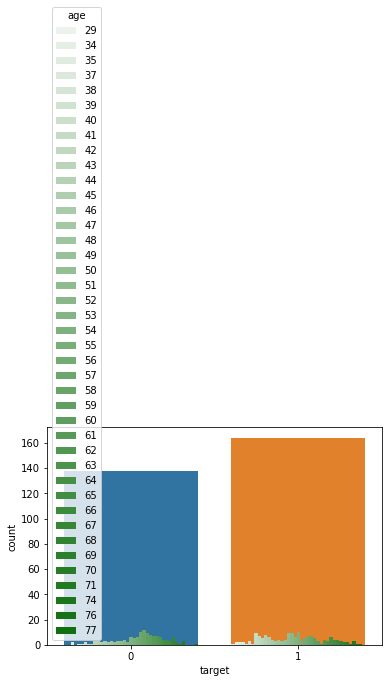

In [22]:
display(sns.countplot(x = 'target',data=df))
display(sns.countplot(x = 'target', hue='age',data=df,color='Green'))

In [17]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

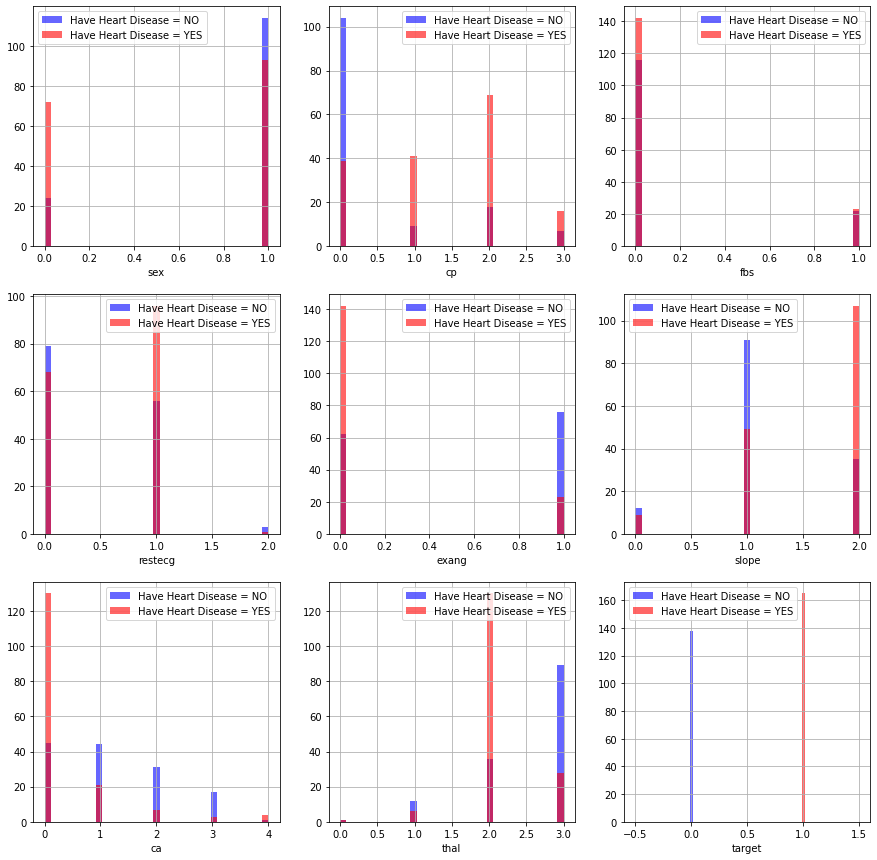

In [18]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

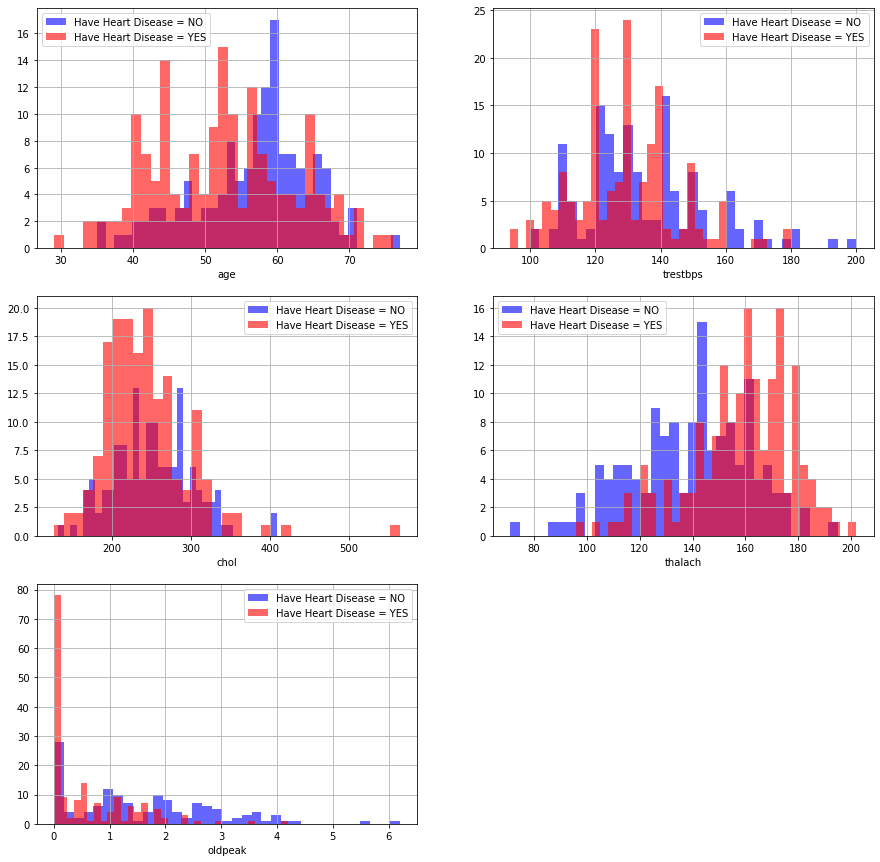

In [19]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### We will do Uni and Bi variate analysis on our Features

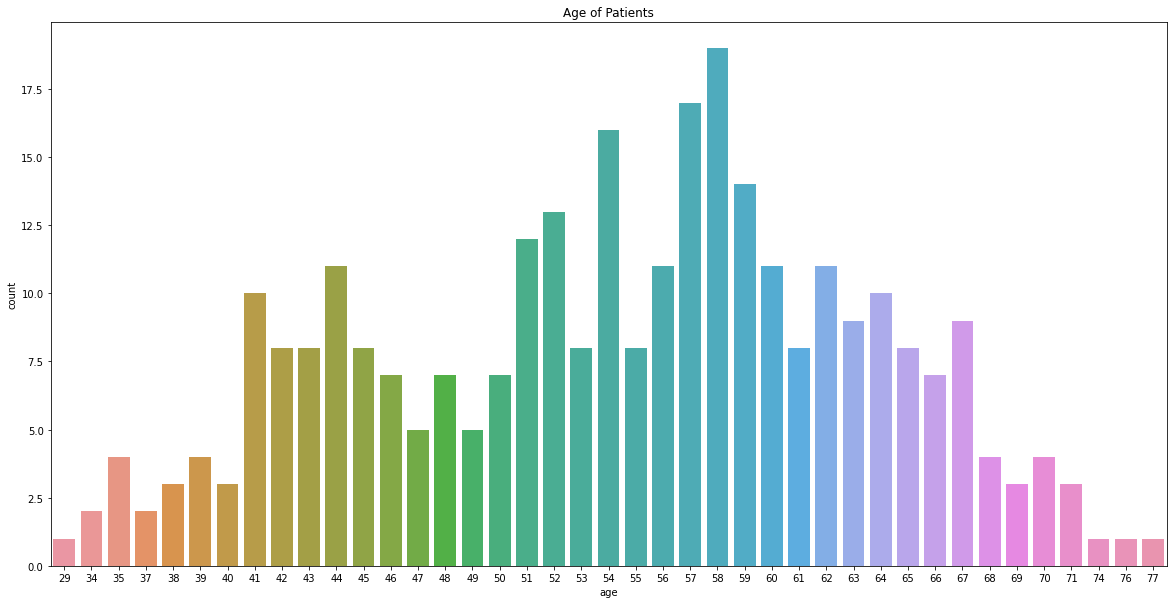

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

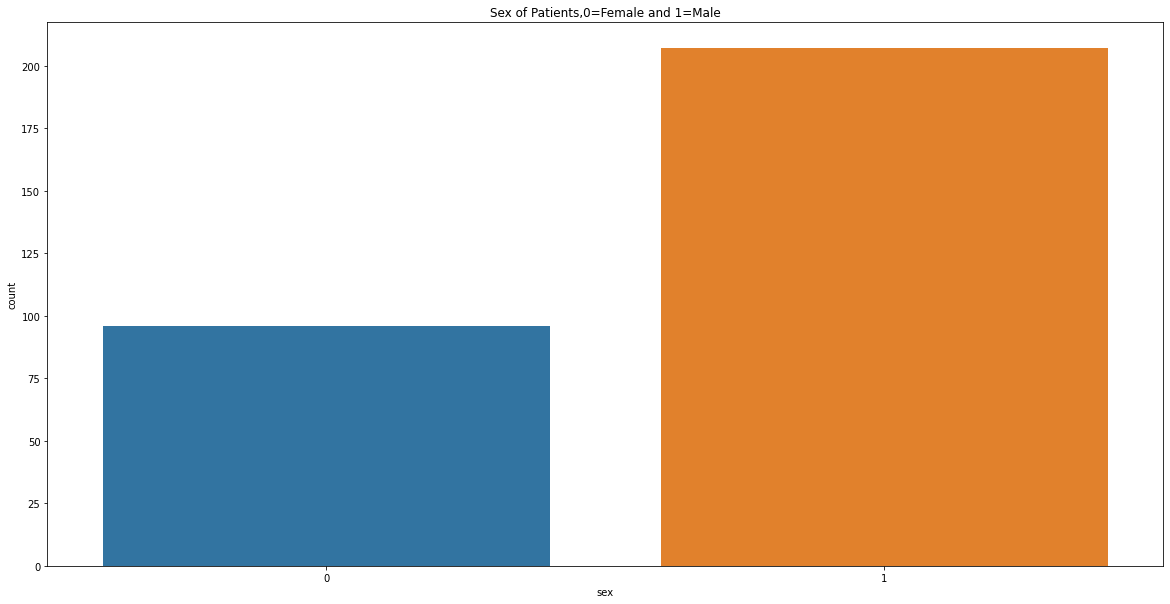

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [ ]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

index   cp
0    Typical Anigma  143
1  Atyppical Anigma   87
2       non-anginal   50
3      asymptomatic   23

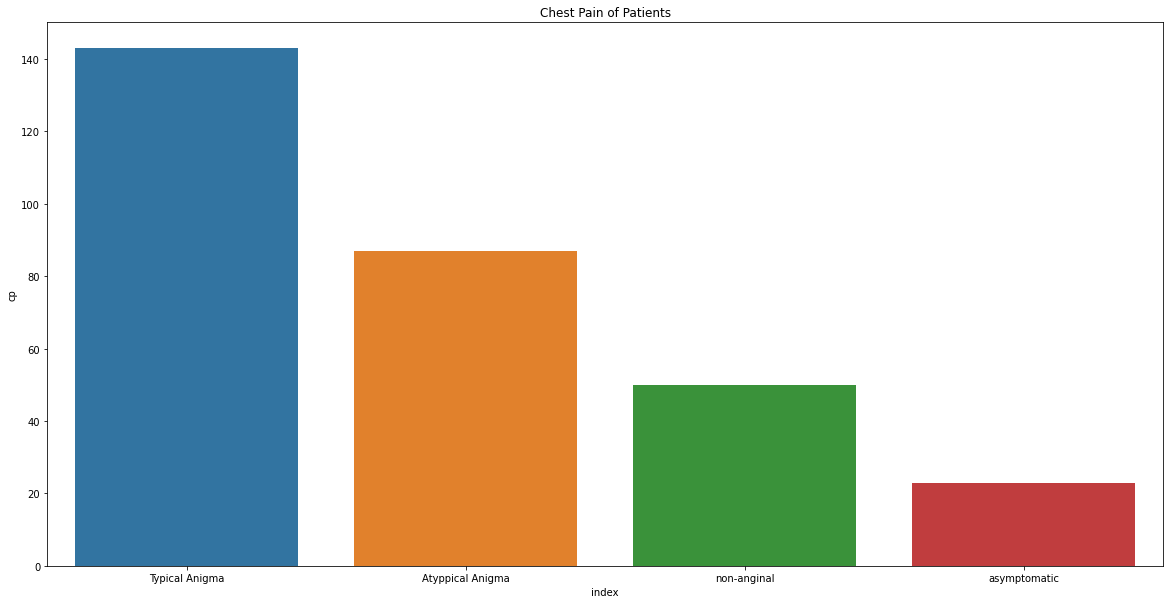

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])

#### We have seen how the the Chest Pain Category is distributed

In [ ]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


index  restecg
0                                             normal      152
1                       having ST-T wave abnormality      147
2  showing probable or definite left ventricular ...        4

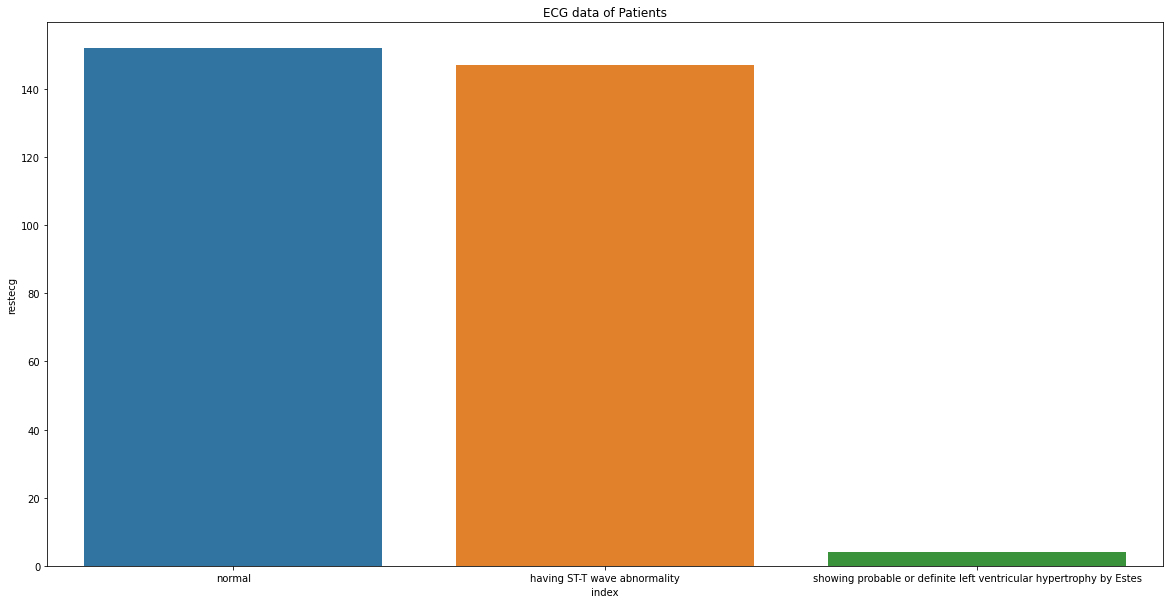

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])

#### This is our ECG Data 

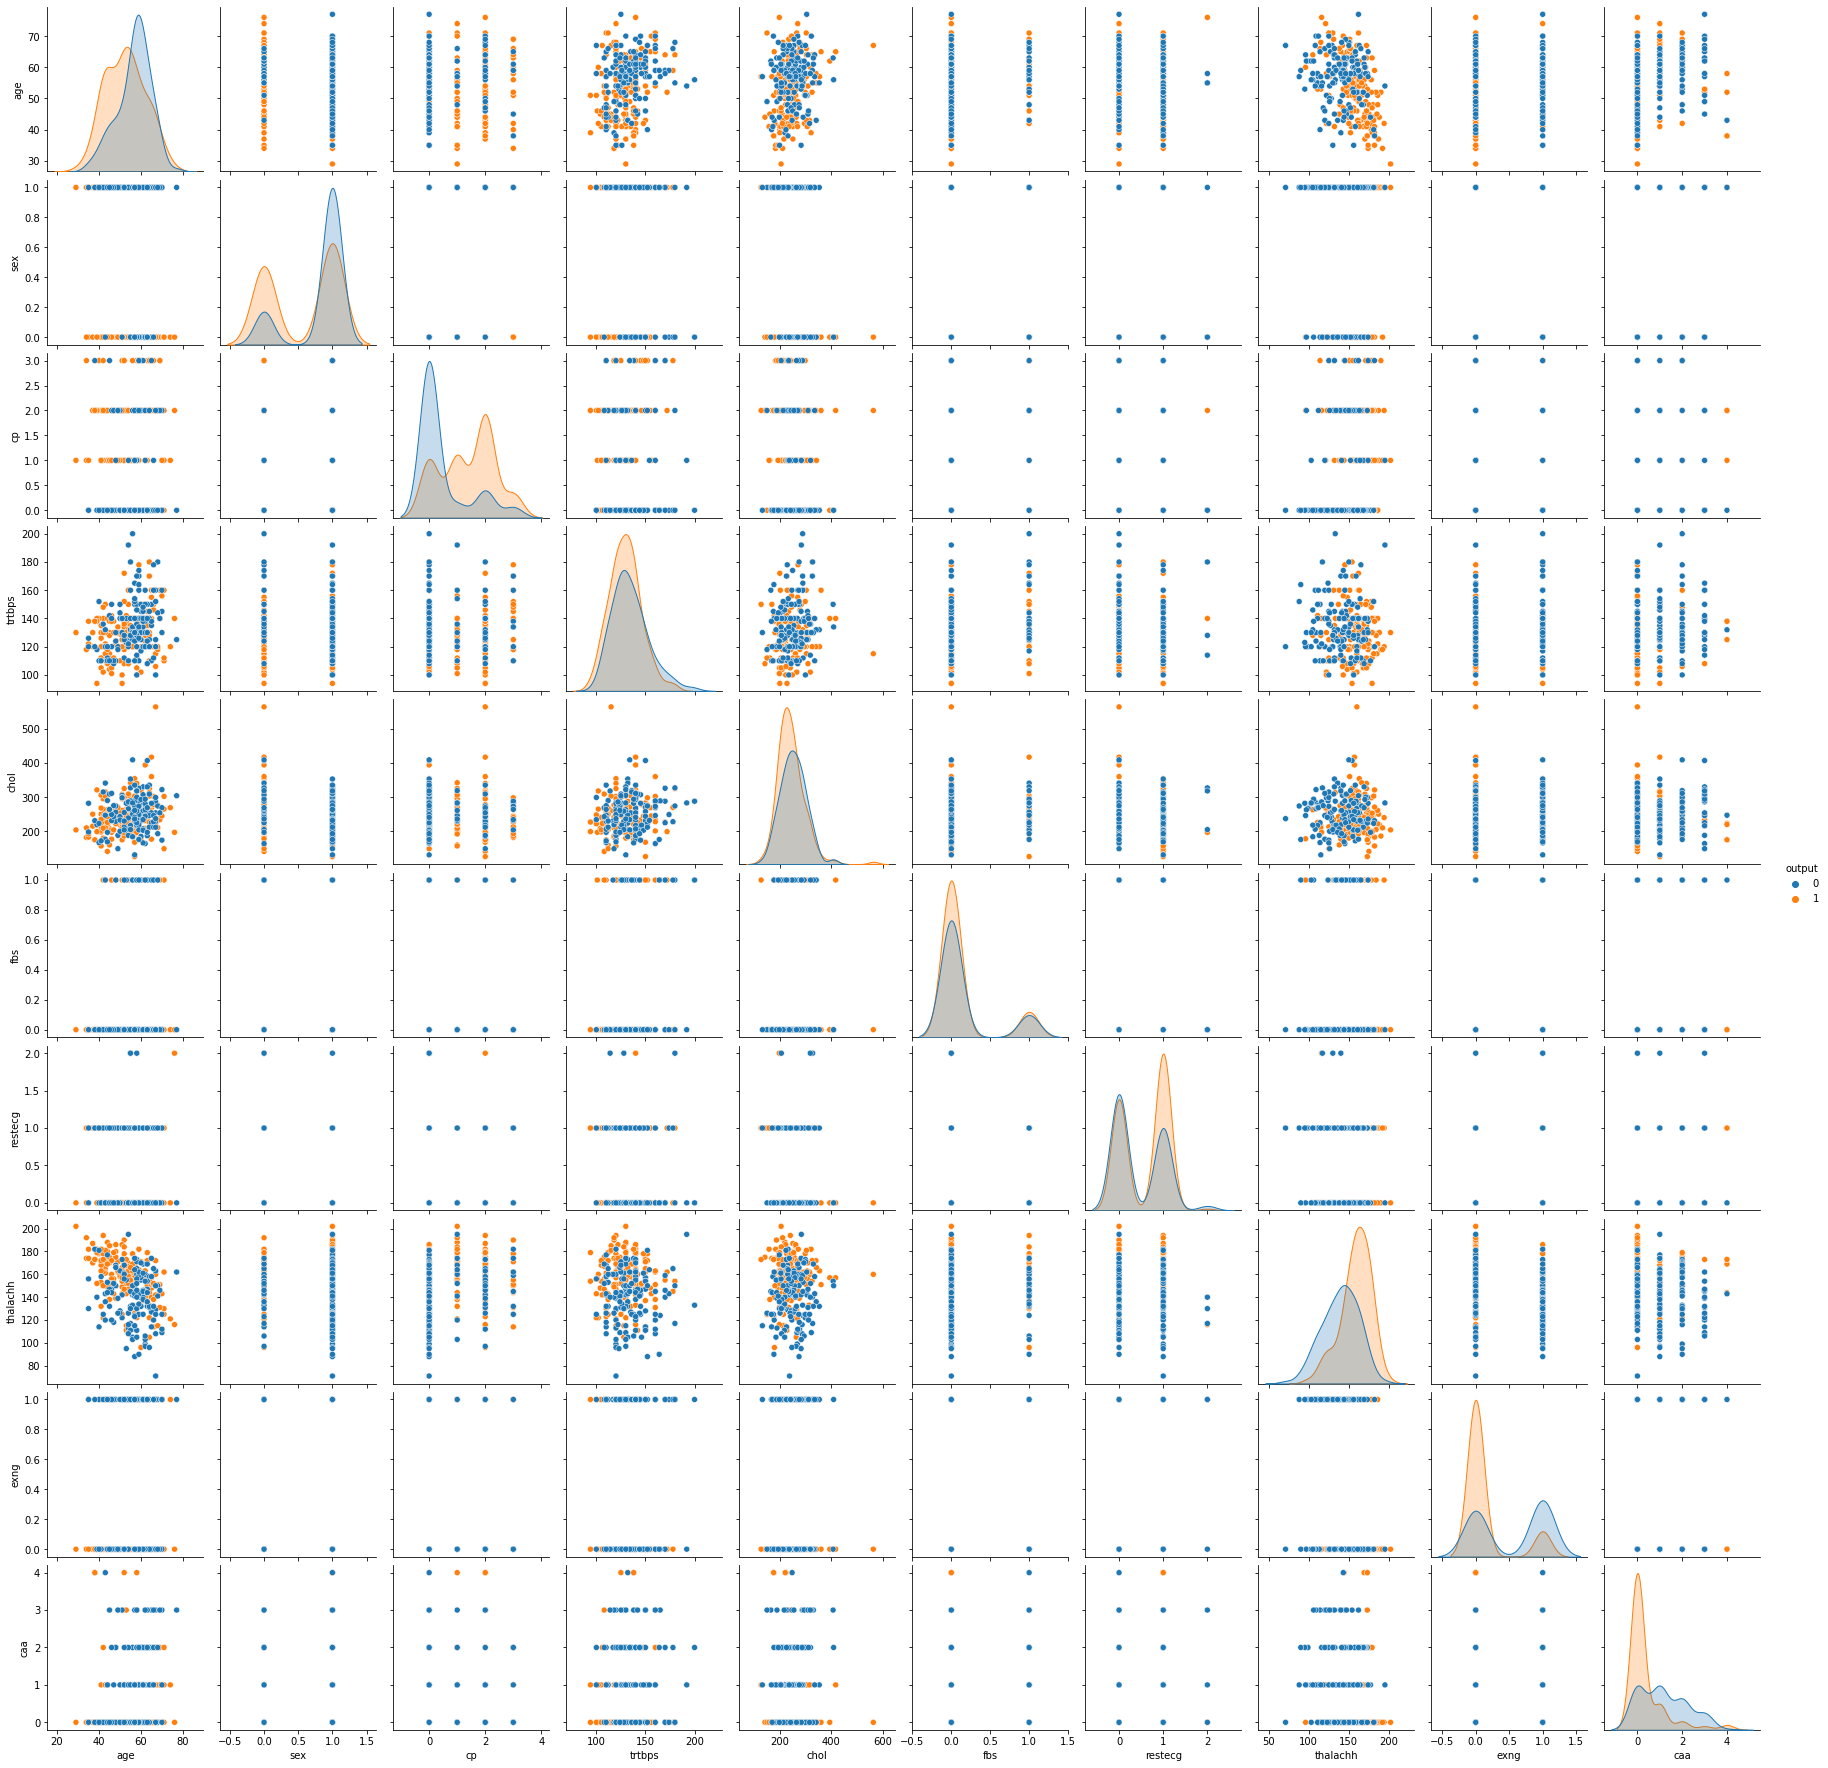

In [ ]:
sns.pairplot(df,hue='output',data=df)

### Let us see for our Continuous Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

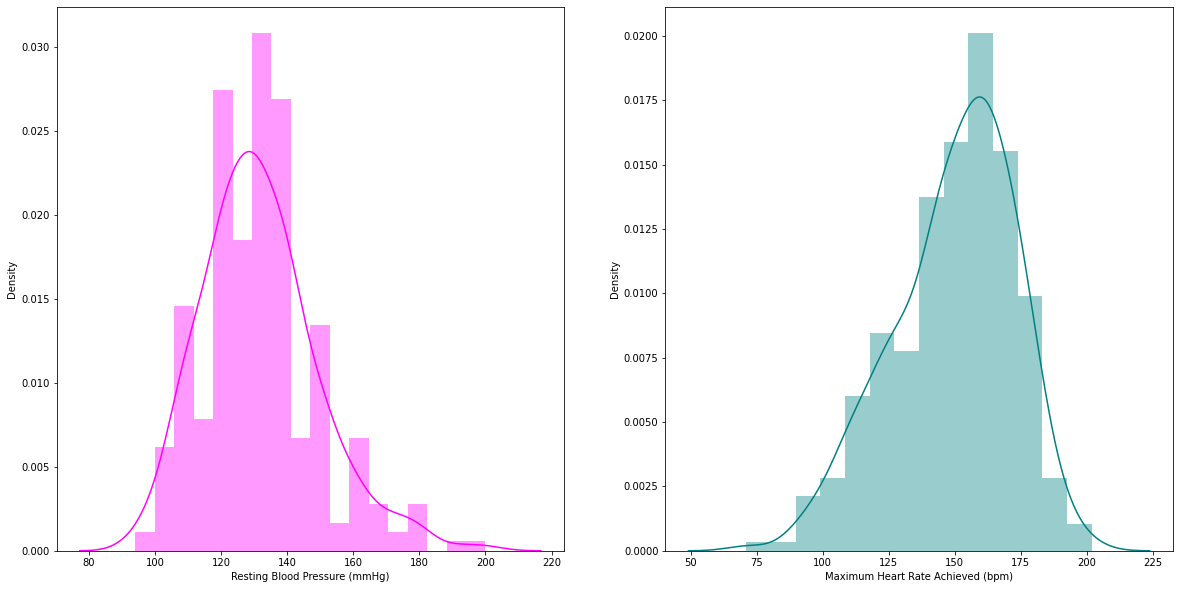

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

C:\Users\khank\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cholestrol')

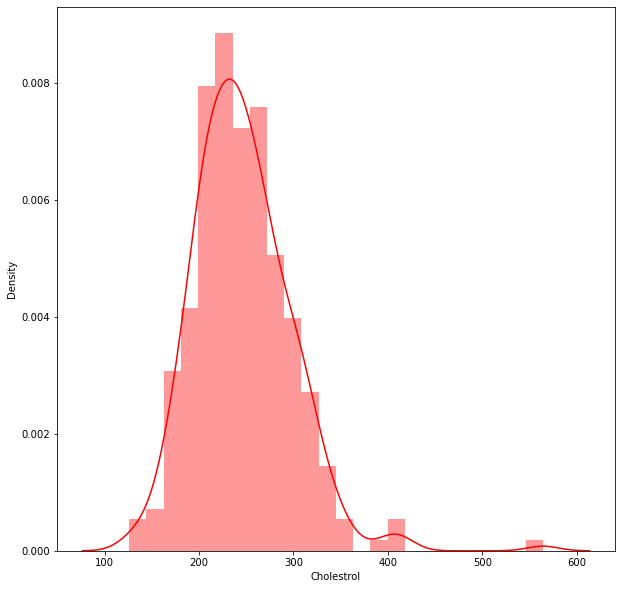

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

#### We have done the Analysis of the data now let's have a look at out data

In [23]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

<AxesSubplot:>

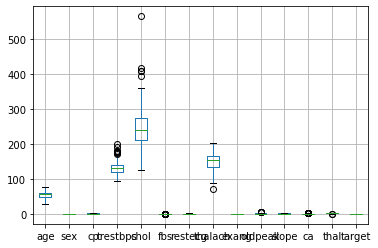

In [24]:
df.boxplot()

<AxesSubplot:>

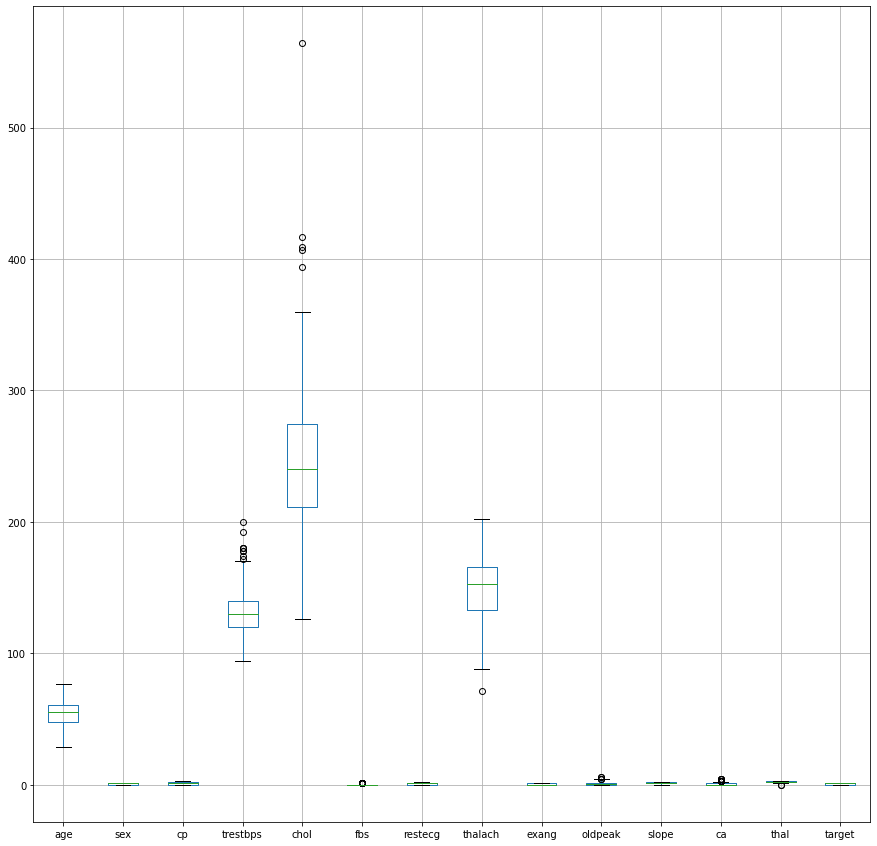

In [30]:
plt.figure(figsize=(15,15))
df.boxplot()

# 6.Data Processing

#### Outliers Treatment

In [ ]:
age-max age found 130
cp-0,1,2,3 
trestbps(BP)-200 max-rnage 370/360 found
chol-max chol 500
thalach (max heart rate)-max 480 min 26

In [51]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [52]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='thalach'>

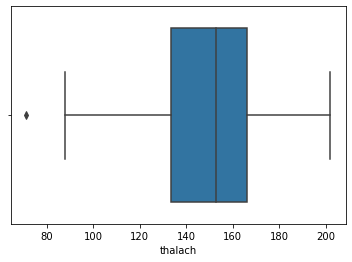

In [63]:
sns.boxplot(x='thalach',data=df)

<AxesSubplot:xlabel='chol'>

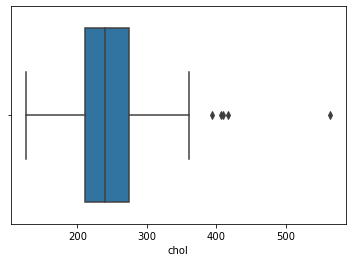

In [62]:
# got outlier here
sns.boxplot(x='chol',data=df)

In [25]:
df.loc[df['chol']>500]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
85   67    0   2       115   564    0        0      160      0      1.6   

    slope  ca  thal  target  
85      1   0     3       1

In [31]:
df.drop(df.loc[df['chol']>500].index, axis = 0,inplace=True)

In [47]:
df.loc[85:87]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
86   68    1   2       118   277    0        1      151      0      1.0   
87   46    1   1       101   197    1        1      156      0      0.0   

    slope  ca  thal  target  
86      2   1     3       1  
87      2   0     3       1

<AxesSubplot:xlabel='cp'>

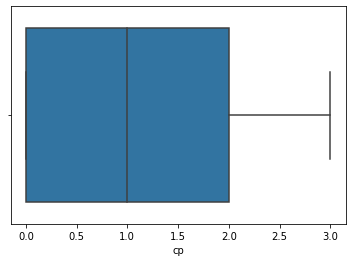

In [48]:
sns.boxplot(x='cp',data=df)

<AxesSubplot:xlabel='age'>

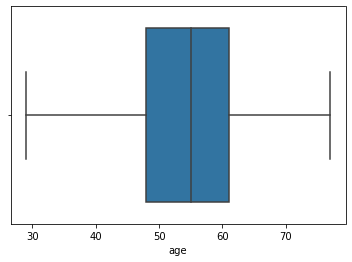

In [49]:
sns.boxplot(x='age',data=df)

<AxesSubplot:xlabel='cp'>

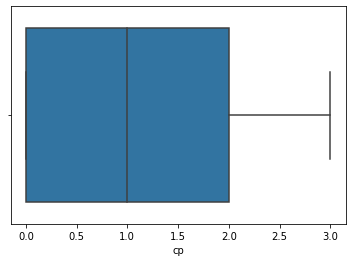

In [50]:
sns.boxplot(x='cp',data=df)

<AxesSubplot:xlabel='trestbps'>

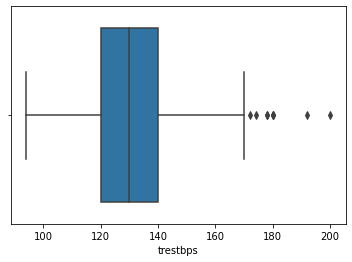

In [52]:
sns.boxplot(x='trestbps',data=df)

If BP is high (140) kideny will be damage and heart will also damage

Highest BP-370/360

In [53]:
df.loc[df['trestbps']>180]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
223   56    0   0       200   288    1        0      133      1      4.0   
248   54    1   1       192   283    0        0      195      0      0.0   

     slope  ca  thal  target  
223      0   2     3       0  
248      2   1     3       0

In [55]:
df.oldpeak.value_counts()

0.0    98
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.8    10
1.6    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [ ]:
Greater than 4 there may be chance of heart disease

In [56]:
df.loc[df['oldpeak']>4]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
101   59    1   3       178   270    0        0      145      0      4.2   
204   62    0   0       160   164    0        0      145      0      6.2   
221   55    1   0       140   217    0        1      111      1      5.6   
250   51    1   0       140   298    0        1      122      1      4.2   
291   58    1   0       114   318    0        2      140      0      4.4   

     slope  ca  thal  target  
101      0   0     3       1  
204      0   3     3       0  
221      0   0     3       0  
250      1   3     3       0  
291      0   3     1       0

### Normalisation 

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
normal_scalar= MinMaxScaler()
x_scaled=normal_scalar.fit_transform(df)
df=pd.DataFrame(x_scaled,columns=df.columns)
df

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.367698  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.426117  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.268041  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.378007  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.783505  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
296  0.583333  0.0  0.000000  0.433962  0.395189  0.0      0.5  0.396947   
297  0.333333  1.0  1.000000  0.150943  0.474227  0.0      0.5  0.465649   
298  0.812500  1.0  0.000000  0.471698  0.230241  1.0      0.5  0.534351   
299  0.583333  1.0  0.000000  0.339623  0.017182  0.0      0.5  0.335878   
300  0.583333  0.0  0.333333  0.339623  0.378007  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  target  
0      0.0  0.370968    0.0  0.00  0.333333     1.0  
1      0.0  0.564516    0.0  0.00  0.666667     1.0  
2      0.0  0.225806    1.0  0.00  0.666667     1.0  
3      0.0  0.129032    1.0  0.00  0.666667     1.0  
4      1.0  0.096774    1.0  0.00  0.666667     1.0  
..     ...       ...    ...   ...       ...     ...  
296    1.0  0.032258    0.5  0.00  1.000000     0.0  
297    0.0  0.193548    0.5  0.00  1.000000     0.0  
298    0.0  0.548387    0.5  0.50  1.000000     0.0  
299    1.0  0.193548    0.5  0.25  1.000000     0.0  
300    0.0  0.000000    0.5  0.25  0.666667     0.0  

[301 rows x 14 columns]

# Do smoting

In [63]:
x = df.drop('target',axis=1)
y= df.target

In [64]:
df['target'].value_counts()

1.0    163
0.0    138
Name: target, dtype: int64

In [60]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [85]:
!pip install imbalanced-learn

In [86]:
!pip install scikit-learn==0.18.2

  Using cached scikit-learn-0.18.2.tar.gz (9.2 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\maharaj\anaconda3\lib\site-packages\scikit_learn-1.1.1.dist-info\
   from C:\Users\Maharaj\anaconda3\Lib\site-packages\~cikit_learn-1.1.1.dist-info
  Moving to c:\users\maharaj\anaconda3\lib\site-packages\sklearn\
   from C:\Users\Maharaj\anaconda3\Lib\site-packages\~-learn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Maharaj\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Maharaj\\AppData\\Local\\Temp\\pip-install-8_6ks95u\\scikit-learn_7a906006cd844be3bb45dc9fda5c2071\\setup.py'"'"'; __file__='"'"'C:\\Users\\Maharaj\\AppData\\Local\\Temp\\pip-install-8_6ks95u\\scikit-learn_7a906006cd844be3bb45dc9fda5c2071\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Maharaj\AppData\Local\Temp\pip-wheel-sx6llods'
       cwd: C:\Users\Maharaj\AppData\Local\Temp\pip-install-8_6ks95u\scikit-learn_7a906006cd844be3bb45dc9fda5c2071\
  Complete output (614 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:


  copying sklearn\manifold\setup.py -> build\lib.win-amd64-3.9\sklearn\manifold
  copying sklearn\manifold\spectral_embedding_.py -> build\lib.win-amd64-3.9\sklearn\manifold
  copying sklearn\manifold\t_sne.py -> build\lib.win-amd64-3.9\sklearn\manifold
  copying sklearn\manifold\__init__.py -> build\lib.win-amd64-3.9\sklearn\manifold
  creating build\lib.win-amd64-3.9\sklearn\manifold\tests
  copying sklearn\manifold\tests\test_isomap.py -> build\lib.win-amd64-3.9\sklearn\manifold\tests
  copying sklearn\manifold\tests\test_locally_linear.py -> build\lib.win-amd64-3.9\sklearn\manifold\tests
  copying sklearn\manifold\tests\test_mds.py -> build\lib.win-amd64-3.9\sklearn\manifold\tests
  copying sklearn\manifold\tests\test_spectral_embedding.py -> build\lib.win-amd64-3.9\sklearn\manifold\tests
  copying sklearn\manifold\tests\test_t_sne.py -> build\lib.win-amd64-3.9\sklearn\manifold\tests
  copying sklearn\manifold\tests\__init__.py -> build\lib.win-amd64-3.9\sklearn\manifold\tests
  cr

    creating build\lib.win-amd64-3.9\sklearn\externals
    copying sklearn\externals\funcsigs.py -> build\lib.win-amd64-3.9\sklearn\externals
    copying sklearn\externals\odict.py -> build\lib.win-amd64-3.9\sklearn\externals
    copying sklearn\externals\setup.py -> build\lib.win-amd64-3.9\sklearn\externals
    copying sklearn\externals\six.py -> build\lib.win-amd64-3.9\sklearn\externals
    copying sklearn\externals\test_externals_setup.py -> build\lib.win-amd64-3.9\sklearn\externals
    copying sklearn\externals\__init__.py -> build\lib.win-amd64-3.9\sklearn\externals
    creating build\lib.win-amd64-3.9\sklearn\externals\joblib
    copying sklearn\externals\joblib\disk.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib
    copying sklearn\externals\joblib\format_stack.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib
    copying sklearn\externals\joblib\func_inspect.py -> build\lib.win-amd64-3.9\sklearn\externals\joblib
    copying sklearn\externals\joblib\hashing.py -> bu

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
import imblearn
from imblearn.over_sampling import SMOTE
# over = SMOTE(sampling_strategy=0.1)
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [74]:
x.shape

(326, 13)

In [75]:
y.shape

(326,)

In [76]:
y.value_counts()

1.0    163
0.0    163
Name: target, dtype: int64

### We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

# Model Building

#### Split dependent and independent feature

In [77]:
x

age  sex        cp  trestbps      chol  fbs   restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.367698  1.0  0.000000  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.426117  0.0  0.500000  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.268041  0.0  0.000000  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.378007  0.0  0.500000  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.783505  0.0  0.500000  0.702290   
..        ...  ...       ...       ...       ...  ...       ...       ...   
321  0.742684  1.0  0.000000  0.390105  0.438978  0.0  0.000000  0.427660   
322  0.601845  1.0  0.037151  0.322945  0.571894  0.0  0.000000  0.757403   
323  0.784052  1.0  0.121836  0.263496  0.527931  0.0  0.182755  0.398263   
324  0.524135  1.0  0.000000  0.129085  0.362333  0.0  0.500000  0.668405   
325  0.685868  1.0  0.000000  0.245283  0.482652  0.0  0.500000  0.238257   

     exang   oldpeak  slope        ca      thal  
0      0.0  0.370968    0.0  0.000000  0.333333  
1      0.0  0.564516    0.0  0.000000  0.666667  
2      0.0  0.225806    1.0  0.000000  0.666667  
3      0.0  0.129032    1.0  0.000000  0.666667  
4      1.0  0.096774    1.0  0.000000  0.666667  
..     ...       ...    ...       ...       ...  
321    0.0  0.450858    0.5  0.244147  1.000000  
322    0.0  0.000000    1.0  0.472137  0.962849  
323    1.0  0.092104    0.5  0.591377  0.544830  
324    0.0  0.005802    1.0  0.250000  0.786584  
325    1.0  0.313064    0.5  0.480417  1.000000  

[326 rows x 13 columns]

In [78]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
321    0.0
322    0.0
323    0.0
324    0.0
325    0.0
Name: target, Length: 326, dtype: float64

### Split train and test data

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [81]:
x_train

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
191  0.645833  1.0  0.000000  0.481132  0.536082  0.0      0.0  0.541985   
51   0.770833  1.0  0.000000  0.245283  0.604811  0.0      0.0  0.610687   
9    0.583333  1.0  0.666667  0.528302  0.144330  0.0      0.5  0.786260   
112  0.291667  1.0  0.000000  0.150943  0.292096  0.0      0.5  0.687023   
16   0.604167  0.0  0.666667  0.245283  0.735395  0.0      0.5  0.770992   
..        ...  ...       ...       ...       ...  ...      ...       ...   
203  0.479167  1.0  0.000000  0.320755  0.443299  0.0      0.5  0.687023   
255  0.437500  1.0  0.000000  0.471698  0.254296  0.0      0.0  0.419847   
72   0.000000  1.0  0.333333  0.339623  0.268041  0.0      0.0  1.000000   
235  0.645833  1.0  0.000000  0.433962  0.573883  0.0      0.0  0.755725   
37   0.520833  1.0  0.666667  0.528302  0.364261  0.0      0.0  0.717557   

     exang   oldpeak  slope    ca      thal  
191    1.0  0.451613    0.5  0.50  1.000000  
51     0.0  0.064516    0.5  0.00  0.666667  
9      0.0  0.258065    1.0  0.00  0.666667  
112    0.0  0.000000    1.0  0.00  1.000000  
16     0.0  0.000000    1.0  0.00  0.666667  
..     ...       ...    ...   ...       ...  
203    1.0  0.000000    1.0  0.25  1.000000  
255    1.0  0.145161    0.5  0.00  1.000000  
72     0.0  0.000000    1.0  0.00  0.666667  
235    0.0  0.193548    0.5  0.50  1.000000  
37     0.0  0.258065    1.0  0.00  1.000000  

[260 rows x 13 columns]

In [82]:
x_test

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
139  0.458333  0.0  0.666667  0.245283  0.580756  0.0      0.0  0.656489   
233  0.458333  1.0  0.000000  0.433962  0.594502  0.0      0.5  0.778626   
214  0.687500  0.0  0.666667  0.339623  0.470790  0.0      0.5  0.198473   
185  0.520833  1.0  0.000000  0.283019  0.481100  0.0      0.0  0.290076   
138  0.729167  1.0  0.000000  0.320755  0.470790  0.0      0.5  0.259542   
..        ...  ...       ...       ...       ...  ...      ...       ...   
159  0.562500  1.0  0.333333  0.245283  0.391753  0.0      0.5  0.748092   
171  0.604167  1.0  0.666667  0.358491  0.336770  0.0      0.0  0.778626   
179  0.750000  0.0  0.000000  0.528302  0.340206  0.0      0.0  0.328244   
14   0.604167  0.0  1.000000  0.528302  0.539519  1.0      0.0  0.694656   
234  0.604167  1.0  0.000000  0.292453  0.597938  0.0      0.0  0.763359   

     exang   oldpeak  slope    ca      thal  
139    0.0  0.096774    1.0  0.00  0.666667  
233    1.0  0.258065    1.0  0.00  1.000000  
214    0.0  0.193548    0.5  0.25  1.000000  
185    1.0  0.354839    0.5  0.25  1.000000  
138    1.0  0.032258    0.5  0.25  1.000000  
..     ...       ...    ...   ...       ...  
159    0.0  0.000000    0.0  0.00  0.666667  
171    0.0  0.516129    1.0  0.50  1.000000  
179    0.0  0.161290    0.5  0.75  1.000000  
14     0.0  0.161290    1.0  0.00  0.666667  
234    0.0  0.000000    1.0  0.50  1.000000  

[66 rows x 13 columns]

In [83]:
y_train

191    0.0
51     1.0
9      1.0
112    1.0
16     1.0
      ... 
203    0.0
255    0.0
72     1.0
235    0.0
37     1.0
Name: target, Length: 260, dtype: float64

In [84]:
y_test

139    1.0
233    0.0
214    0.0
185    0.0
138    1.0
      ... 
159    1.0
171    0.0
179    0.0
14     1.0
234    0.0
Name: target, Length: 66, dtype: float64

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

#### Create Logistic Regression model

In [86]:
logreg= LogisticRegression()

#### Do training

In [87]:
logreg.fit(x_train,y_train)

LogisticRegression()

#### Prediction

In [88]:
y_pred = logreg.predict(x_test)
y_pred

array([1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.])

#### check accuracy , precision and reacall

In [89]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[24,  8],
       [ 6, 28]], dtype=int64)

### Test accuracy

In [90]:
accuracy_score(y_test,y_pred)

0.7878787878787878

In [91]:
precision_score(y_test,y_pred)

0.7777777777777778

In [92]:
recall_score(y_test,y_pred)

0.8235294117647058

### Training accuracy

In [93]:
y_pred_train=logreg.predict(x_train)

In [94]:
accuracy_score(y_train,y_pred_train)

0.8615384615384616

### confusion matrix

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        32
         1.0       0.78      0.82      0.80        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



### ROC AUC

In [ ]:
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

#### As we see the Logistic Regression Model have a 85% train accuracy  and 75% test accuracy

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

### Create Decision model


In [97]:
DT_model=DecisionTreeClassifier()

### Do training

In [98]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

### Prediction

In [99]:
y_pred=DT_model.predict(x_test)

### Test Accuracy

In [100]:
accuracy_score(y_test,y_pred)

0.7727272727272727

### Train Accuracy

In [101]:
y_pred_train=DT_model.predict(x_train)

In [102]:
accuracy_score(y_train,y_pred_train)

1.0

### Prunning

In [103]:
values = DT_model.cost_complexity_pruning_path(x_train,y_train)
print(values)

{'ccp_alphas': array([0.        , 0.0035503 , 0.00357143, 0.00496795, 0.00499145,
       0.00512821, 0.00512821, 0.00573937, 0.00576923, 0.00659341,
       0.00683761, 0.00683761, 0.00741758, 0.00855875, 0.00875214,
       0.00879121, 0.00911681, 0.00923077, 0.01039395, 0.01150641,
       0.02334331, 0.02570344, 0.04139523, 0.05410733, 0.14501086]), 'impurities': array([0.        , 0.00710059, 0.01424345, 0.0291473 , 0.04412165,
       0.05437806, 0.06463447, 0.08759195, 0.09336118, 0.09995459,
       0.1067922 , 0.1136298 , 0.12104739, 0.12960613, 0.13835827,
       0.14714948, 0.15626629, 0.16549706, 0.17589101, 0.21041024,
       0.23375355, 0.259457  , 0.30085222, 0.35495956, 0.49997041])}


In [104]:
ccp_alpha_list = values['ccp_alphas']
ccp_alpha_list

array([0.        , 0.0035503 , 0.00357143, 0.00496795, 0.00499145,
       0.00512821, 0.00512821, 0.00573937, 0.00576923, 0.00659341,
       0.00683761, 0.00683761, 0.00741758, 0.00855875, 0.00875214,
       0.00879121, 0.00911681, 0.00923077, 0.01039395, 0.01150641,
       0.02334331, 0.02570344, 0.04139523, 0.05410733, 0.14501086])

In [105]:
train_acc=[]
test_acc = []
for ccp_alpha in ccp_alpha_list:
    dt_model=DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    dt_model.fit(x_train,y_train)
    
    train_acc.append(dt_model.score(x_train,y_train))
    test_acc.append(dt_model.score(x_test,y_test))

In [114]:
max(test_acc)

0.8484848484848485

In [107]:
max(train_acc)

1.0

In [108]:
len(test_acc)

25

In [115]:
test_acc.index(max(test_acc))

0

In [116]:
ccp_alpha_list[0]

0.0

# hyperparameter tunning for Decision

In [165]:
dt_clf=DecisionTreeClassifier()
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
gscv_dt_model=GridSearchCV(dt_clf,hyperparameters,cv=3)
gscv_dt_model

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [166]:
gscv_dt_model.fit(x_train,y_train)
gscv_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [169]:
# testing Accuracy after tunning

y_pred_gscv = gscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred_gscv)

0.7424242424242424

In [174]:
# trainiing Accuracy after Tunning
y_train_gscv = gscv_dt_model.predict(x_train)
accuracy_score(y_train,y_train_gscv)

0.9653846153846154

#### As we see our Decision Tree Model does not perform well as it gives a score of only test accuracy 72% and training accuracy is 100%

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

### Create Instance of model

In [118]:
RF_model=RandomForestClassifier()
RF_model

RandomForestClassifier()

### Do Training

In [119]:
RF_model.fit(x_train,y_train)

RandomForestClassifier()

### prediction

In [120]:
y_pred=RF_model.predict(x_test)

### checking accuracy

In [121]:
test_score= RF_model.score(x_test,y_test)
train_score=RF_model.score(x_train,y_train)
print('test score is ',test_score,'train score is ',train_score)

test score is  0.8333333333333334 train score is  1.0


#### RF also gives us an accuracy of around 83%

# Hyper parameter tunning for Random Forest

In [ ]:
params = {'n_estimators':np.arange(10,20),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,20),
         'min_samples_leaf':np.arange(1,10),
         'min_samples_split':np.arange(2,10),
         'max_features':['auto'],
         'random_state':[10],
         'ccp_alpha':np.arange(0.01,1,0.1)}

rf_model=RandomForestClassifier()

rf_gscv=GridSearchCV(rf_model,param_grid=params)
rf_gscv.fit(x_train,y_train)
rf_gscv.best_params_

In [ ]:
rf_gscv.score(x_test,y_test)

In [ ]:
train =80 test=20

Random state =121


# K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

NameError: name 'error_rate' is not defined

<Figure size 720x432 with 0 Axes>

#### As we see from the graph we should select K= 12 as it gives the best error rate

### Create instance of the model

In [124]:
knn_model=KNeighborsClassifier()

### Do training

In [126]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### Prediction

In [127]:
y_pred=knn_model.predict(x_test)

In [128]:
confusion_matrix(y_test,y_pred)

array([[26,  6],
       [ 8, 26]], dtype=int64)

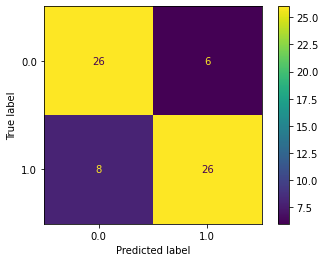

In [129]:
plot_confusion_matrix(knn_model,x_test,y_test)

### Test Accuracy

In [135]:
accuracy_score(y_test,y_pred)

0.7878787878787878

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79        32
         1.0       0.81      0.76      0.79        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



### Train accuracy

In [137]:
y_pred_train=knn_model.predict(x_train)

In [138]:
accuracy_score(y_train,y_pred_train)

0.8653846153846154

#### As we see KNN gives us an accuracy of around 85% which is good

# Support Vector Machine(SVM)

In [139]:
from sklearn.svm import SVC

### Create instance and train model

In [140]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

### Test accuracy

In [141]:
# Testing Data Accuracy
y_pred = svc_model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

clf_report = classification_report(y_test, y_pred)

print("Classification report :\n",clf_report)

Accuracy Score is : 0.7878787878787878
Confusion Matrix :
 [[24  8]
 [ 6 28]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        32
         1.0       0.78      0.82      0.80        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



### Train Accuracy

In [142]:
# Training Data accuracy
y_pred = svc_model.predict(x_train)
acc_score = accuracy_score(y_train, y_pred)
print("Accuracy Score is :",acc_score)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

clf_report = classification_report(y_train, y_pred)

print("Classification report :\n",clf_report)

Accuracy Score is : 0.8923076923076924
Confusion Matrix :
 [[113  18]
 [ 10 119]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       131
         1.0       0.87      0.92      0.89       129

    accuracy                           0.89       260
   macro avg       0.89      0.89      0.89       260
weighted avg       0.89      0.89      0.89       260



#### We get an accuracy of 89% in SVM on training data

#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

# Adaboost  Classifier

In [143]:
from sklearn.ensemble import AdaBoostClassifier

### Create insatance of the model

In [144]:
AB_model= AdaBoostClassifier(random_state=1)
AB_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

### Prediction

In [145]:
ada_y_prediction=AB_model.predict(x_test)

### Test Accuracy

In [146]:
accuracy_score(y_test,ada_y_prediction)

0.7727272727272727

### Train Accuracy

In [147]:
ada_y_prediction_train=AB_model.predict(x_train)
accuracy_score(y_train,ada_y_prediction_train)

0.9423076923076923

#### As we see our model has performed very poorly with just 50% accuracy 

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
model_acc

NameError: name 'model_acc' is not defined

### Logistic Regression

In [150]:
param_grid= {
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
    
}

In [151]:
grid1= GridSearchCV(LogisticRegression(),param_grid)

In [152]:
grid1.fit(x_train,encoded_y)

NameError: name 'encoded_y' is not defined

In [153]:
grid1.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### Let us apply these para in our Model

In [154]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [155]:
logreg1.fit(x_train,encoded_y)

NameError: name 'encoded_y' is not defined

In [156]:
logreg_pred= logreg1.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [157]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

NameError: name 'encoded_ytest' is not defined

In [158]:
logreg_pred_conf_matrix

NameError: name 'logreg_pred_conf_matrix' is not defined

In [159]:
print(logreg_pred_acc_score*100,"%")

NameError: name 'logreg_pred_acc_score' is not defined

#### We got an accuracy of 81%

# KNN

In [160]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [161]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [162]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

NameError: name 'RepeatedStratifiedKFold' is not defined

In [163]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

NameError: name 'knn' is not defined

In [164]:
grid_search.fit(x_train,encoded_y)

NameError: name 'grid_search' is not defined

In [ ]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

#### Let's apply

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

In [ ]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [ ]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [ ]:
print(knn_pred_acc_score*100,"%")

82.41758241758241 %


#### We have an Accuracy of 82.5%

# SVM

In [ ]:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

#### Let us apply these

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')

In [ ]:
svc.fit(x_train,encoded_y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_pred= svc.predict(x_test)

In [ ]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [ ]:
svm_pred_conf_matrix

array([[32, 12],
       [ 5, 42]])

In [ ]:
print(svm_pred_acc_score*100,"%")

81.31868131868131 %


#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [ ]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [ ]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### Let us build a proper confusion matrix for our model

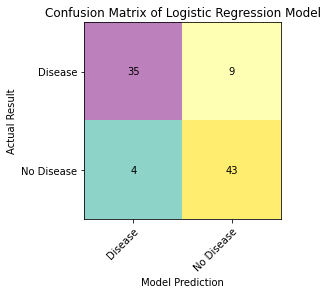

ACCURACY of our model is  85.71428571428571 %


In [ ]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

## We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg,open('heart.pkl','wb'))

# **Using Auto ML**


# EVAL ML : 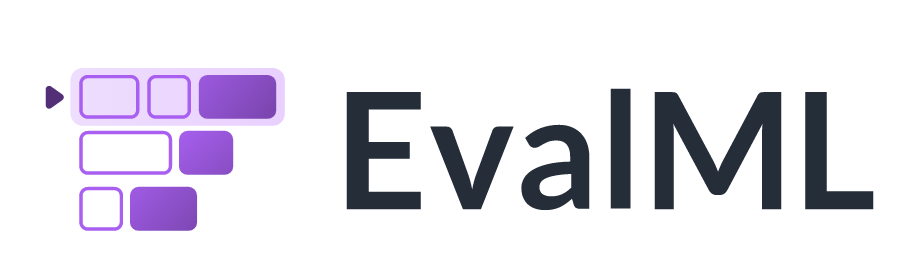
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.





## Installing Eval ML

In [ ]:
!pip install evalml

     |████████████████████████████████| 6.3 MB 3.8 MB/s 
     |████████████████████████████████| 80 kB 6.3 MB/s 
     |████████████████████████████████| 206 kB 62.6 MB/s 
     |████████████████████████████████| 11.3 MB 35.4 MB/s 
     |████████████████████████████████| 1.5 MB 40.1 MB/s 
     |████████████████████████████████| 2.0 MB 48.1 MB/s 
     |████████████████████████████████| 10.3 MB 31.2 MB/s 
     |████████████████████████████████| 1.6 MB 58.3 MB/s 
     |████████████████████████████████| 5.8 MB 26.7 MB/s 
     |████████████████████████████████| 21.8 MB 1.3 MB/s 
     |████████████████████████████████| 18.0 MB 116 kB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 135 kB 62.8 MB/s 
     |████████████████████████████████| 356 kB 59.2 MB/s 
     |████████████████████████████████| 166.7 MB 7.5 kB/s 
     |████████████████████████████████| 327 kB 48.7 MB/s 
     |████████████████████████████████| 79.9 MB 42 kB/s 
     |██████████

# Let us load our DataSet.

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
df.head()

age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0   63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1   37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2   41    0   1     130   204    0  ...     0      1.4    2    0      2       1
3   56    1   1     120   236    0  ...     0      0.8    2    0      2       1
4   57    0   0     120   354    0  ...     1      0.6    2    0      2       1

[5 rows x 14 columns]

Let us split our Data Set into Dependent i.e our Targer variable and independent variable

In [ ]:
x= df.iloc[:,:-1]
x

age       sex        cp  ...  thalachh      exng       caa
0    0.952197  0.681005  1.973123  ...  0.015443 -0.696631 -0.714429
1   -1.915313  0.681005  1.002577  ...  1.633471 -0.696631 -0.714429
2   -1.474158 -1.468418  0.032031  ...  0.977514 -0.696631 -0.714429
3    0.180175  0.681005  0.032031  ...  1.239897 -0.696631 -0.714429
4    0.290464 -1.468418 -0.938515  ...  0.583939  1.435481 -0.714429
..        ...       ...       ...  ...       ...       ...       ...
298  0.290464 -1.468418 -0.938515  ... -1.165281  1.435481 -0.714429
299 -1.033002  0.681005  1.973123  ... -0.771706 -0.696631 -0.714429
300  1.503641  0.681005 -0.938515  ... -0.378132 -0.696631  1.244593
301  0.290464  0.681005 -0.938515  ... -1.515125  1.435481  0.265082
302  0.290464 -1.468418  0.032031  ...  1.064975 -0.696631  0.265082

[303 rows x 10 columns]

In [ ]:
y= df.iloc[:,-1:]
y= lbl.fit_transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Importing Eval ML Library**

In [ ]:
import evalml

Eval ML Library will do all the pre processing techniques for us and split the data for us

In [ ]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

**Running the Auto ML to select best Algorithm**

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, extra_trees, decision_tree, lightgbm, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 15.699

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.488
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 7.031
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.452
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.517
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.488


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.534
Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.442
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.656

Search finished after 00:15            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline Log Loss Binary: 0.441986


As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer
We can also commpare the rest of the models

In [ ]:

automl.rankings


id  ...                                         parameters
0   7  ...  {'Imputer': {'categorical_impute_strategy': 'm...
1   3  ...  {'Imputer': {'categorical_impute_strategy': 'm...
2   5  ...  {'Imputer': {'categorical_impute_strategy': 'm...
3   1  ...  {'Imputer': {'categorical_impute_strategy': 'm...
4   4  ...  {'Imputer': {'categorical_impute_strategy': 'm...
5   6  ...  {'Imputer': {'categorical_impute_strategy': 'm...
6   8  ...  {'Imputer': {'categorical_impute_strategy': 'm...
7   2  ...  {'Imputer': {'categorical_impute_strategy': 'm...
8   0  ...      {'Baseline Classifier': {'strategy': 'mode'}}

[9 rows x 9 columns]

In [ ]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Imputer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [ ]:
best_pipeline=automl.best_pipeline

We can have a Detailed description of our Best Selected Model

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.457       0.584 0.785 0.893      0.857 0.738                     0.779            0.790        161           81
1                      0.412       0.676 0.806 0.903      0.833 0.822                     0.837   

In [ ]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.8852813852813852),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

Now if we want to build our Model for a specific objective we can do that 

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, extra_trees, decision_tree, lightgbm, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.847
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.723
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.874
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.843
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.848


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:05:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:05:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:05:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.849


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.887
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.822

Search finished after 00:14            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline AUC: 0.887205


In [ ]:
automl_auc.rankings

id  ...                                         parameters
0   7  ...  {'Imputer': {'categorical_impute_strategy': 'm...
1   3  ...  {'Imputer': {'categorical_impute_strategy': 'm...
2   6  ...  {'Imputer': {'categorical_impute_strategy': 'm...
3   5  ...  {'Imputer': {'categorical_impute_strategy': 'm...
4   1  ...  {'Imputer': {'categorical_impute_strategy': 'm...
5   4  ...  {'Imputer': {'categorical_impute_strategy': 'm...
6   8  ...  {'Imputer': {'categorical_impute_strategy': 'm...
7   2  ...  {'Imputer': {'categorical_impute_strategy': 'm...
8   0  ...      {'Baseline Classifier': {'strategy': 'mode'}}

[9 rows x 9 columns]

In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.1 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.893 0.738      0.857        161           81
1           0.903 0.822      0.833        161           81
2           0.866 0.712      0.913        162           80
mean        0.887 0.757      0.868          -            -
std         0.019 0.057      0.041          -            -
coef of var 0.021 

In [ ]:
best_pipeline_auc = automl_auc.best_pipeline


In [ ]:

# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.8852813852813852)])

We got an 88.5 % AUC Score which is the highest of all

Save the model

In [ ]:
best_pipeline.save("model.pkl")

Loading our Model

In [ ]:

final_model=automl.load('model.pkl')

In [ ]:
final_model.predict_proba(X_test)

0         1
0   0.468324  0.531676
1   0.093848  0.906152
2   0.383646  0.616354
3   0.107272  0.892728
4   0.141027  0.858973
..       ...       ...
56  0.268136  0.731864
57  0.846652  0.153348
58  0.861607  0.138393
59  0.739515  0.260485
60  0.878833  0.121167

[61 rows x 2 columns]